In [2]:
# Exploratory data analysis and visualisation libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# Data preprocessing and model selection
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import scale, StandardScaler

# Models from Scikit-Learn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Model evaluations 
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error, r2_score, mean_absolute_error

# Load and preprocess the dataset
seed = 20
df1 = pd.read_csv("./HouseData.csv")
df1


<>:31: SyntaxWarning: invalid escape sequence '\H'
<>:31: SyntaxWarning: invalid escape sequence '\H'
C:\Users\oztur\AppData\Local\Temp\ipykernel_10640\3630459230.py:31: SyntaxWarning: invalid escape sequence '\H'
  df1 = pd.read_csv("functions\HouseData.csv")
C:\Users\oztur\AppData\Local\Temp\ipykernel_10640\3630459230.py:31: SyntaxWarning: invalid escape sequence '\H'
  df1 = pd.read_csv("functions\HouseData.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'functions\\HouseData.csv'

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25155 entries, 0 to 25154
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                25155 non-null  int64 
 1   district                  25155 non-null  object
 2   price                     25155 non-null  object
 3   address                   25155 non-null  object
 4   AdUpdateDate              25155 non-null  object
 5   Category                  25155 non-null  object
 6   GrossSquareMeters         25155 non-null  object
 7   BuildingAge               25155 non-null  object
 8   NumberFloorsofBuilding    25155 non-null  int64 
 9   UsingStatus               25155 non-null  object
 10  EligibilityForInvestment  21506 non-null  object
 11  BuildStatus               11231 non-null  object
 12  TitleStatus               9712 non-null   object
 13  ItemStatus                18332 non-null  object
 14  NumberOfBathrooms     

In [3]:
df1.shape

(25155, 38)

In [4]:
df1.isnull().sum()


Unnamed: 0                      0
district                        0
price                           0
address                         0
AdUpdateDate                    0
Category                        0
GrossSquareMeters               0
BuildingAge                     0
NumberFloorsofBuilding          0
UsingStatus                     0
EligibilityForInvestment     3649
BuildStatus                 13924
TitleStatus                 15443
ItemStatus                   6823
NumberOfBathrooms               0
NumberOfWCs                 17026
AdCreationDate                  0
Type                            0
NetSquareMeters                 0
NumberOfRooms                   0
FloorLocation                   0
HeatingType                     0
CreditEligibility               0
InsideTheSite                   0
StructureType               14749
MortgageStatus              19097
Swap                         4316
Balcony                     16046
PriceStatus                     0
RentalIncome  

In [5]:
for column in df1.columns:
    print(df1.groupby(column)[column].agg("count"), "\n", 50*"-")

Unnamed: 0
0        1
1        1
2        1
3        1
4        1
        ..
25150    1
25151    1
25152    1
25153    1
25154    1
Name: Unnamed: 0, Length: 25155, dtype: int64 
 --------------------------------------------------
district
adalar             26
arnavutkoy        256
atasehir          378
avcilar           933
bagcilar          522
bahcelievler     1429
bakirkoy          673
basaksehir        671
bayrampasa        174
besiktas          659
beykoz            148
beylikduzu        888
beyoglu           228
buyukcekmece      756
catalca            74
cekmekoy          923
esenler           265
esenyurt         1415
eyupsultan        635
fatih             488
gaziosmanpasa     709
gungoren          221
kadikoy          1446
kagithane         756
kartal            619
kucukcekmece     1361
maltepe          1230
pendik            678
sancaktepe        918
sariyer          1449
sile               95
silivri           342
sisli             595
sultanbeyli       314
sultangazi  

In [6]:
df1.columns


Index(['Unnamed: 0', 'district', 'price', 'address', 'AdUpdateDate',
       'Category', 'GrossSquareMeters', 'BuildingAge',
       'NumberFloorsofBuilding', 'UsingStatus', 'EligibilityForInvestment',
       'BuildStatus', 'TitleStatus', 'ItemStatus', 'NumberOfBathrooms',
       'NumberOfWCs', 'AdCreationDate', 'Type', 'NetSquareMeters',
       'NumberOfRooms', 'FloorLocation', 'HeatingType', 'CreditEligibility',
       'InsideTheSite', 'StructureType', 'MortgageStatus', 'Swap', 'Balcony',
       'PriceStatus', 'RentalIncome', 'NumberOfBalconies', 'BalconyType',
       'HallSquareMeters', 'WCSquareMeters', 'IsItVideoNavigable?',
       'Subscription', 'BathroomSquareMeters', 'BalconySquareMeters'],
      dtype='object')

In [7]:
df2 = df1.drop(['Unnamed: 0', 'address', 'AdUpdateDate', 'Category', 'UsingStatus','NumberFloorsofBuilding', 'EligibilityForInvestment',
       'BuildStatus', 'TitleStatus', 'NumberOfWCs', 
       'AdCreationDate', 'Type', 'NetSquareMeters', 
       'CreditEligibility', 'StructureType', 'MortgageStatus', 
       'Swap', 'Balcony', 'PriceStatus', 'RentalIncome', 'NumberOfBalconies', 
       'BalconyType', 'HallSquareMeters', 'WCSquareMeters', 'IsItVideoNavigable?',
       'Subscription', 'BathroomSquareMeters', 'BalconySquareMeters'], axis = "columns")
df2

,district,price,GrossSquareMeters,BuildingAge,ItemStatus,NumberOfBathrooms,NumberOfRooms,FloorLocation,HeatingType,InsideTheSite
0,adalar,"3,100,000TL",160 m2,21 Ve Üzeri,Eşyalı,2,3+1,Çatı Katı,Kombi Doğalgaz,Hayır
1,adalar,"1,600,000TL",120 m2,5-10,Eşyalı,1,2+1,Bahçe Katı,Kombi Doğalgaz,Hayır
2,adalar,"18,500,000TL",350 m2,21 Ve Üzeri,Boş,3,3+1,Düz Giriş,Kombi Doğalgaz,Hayır
3,adalar,"9,500,000TL",550 m2,11-15,NaN,4,8+ Oda,Düz Giriş,Kombi Doğalgaz,Hayır
4,adalar,"25,000,000TL",840 m2,21 Ve Üzeri,NaN,3,8+ Oda,Düz Giriş,Isıtma Yok,Hayır
...,...,...,...,...,...,...,...,...,...,...
25150,zeytinburnu,"1,850,000TL",180 m2,5-10,NaN,2,4+1,4. Kat,Kombi Doğalgaz,Hayır
25151,zeytinburnu,"1,100,000TL",52 m2,3,Boş,1,1+1,3. Kat,Merkezi (Pay Ölçer),Hayır
25152,zeytinburnu,"9,000,000TL",176 m2,0 (Yeni),Boş,2,3+1,17. Kat,Jeotermal,Hayır
25153,zeytinburnu,"13,000,000TL",170 m2,5-10,Boş,2,3+1,20. Kat,Merkezi Doğalgaz,Hayır


In [8]:
df2.isnull().sum()


district                0
price                   0
GrossSquareMeters       0
BuildingAge             0
ItemStatus           6823
NumberOfBathrooms       0
NumberOfRooms           0
FloorLocation           0
HeatingType             0
InsideTheSite           0
dtype: int64

In [9]:
# Fill missing values by distribution rate
dist_rate = df2.ItemStatus.value_counts(normalize = True)
# Item status distribution rates
print(dist_rate)

ItemStatus
Boş       0.954124
Eşyalı    0.045876
Name: proportion, dtype: float64


In [10]:
# Missing values on column
missing = df2['ItemStatus'].isnull()


In [11]:
# Impute missing values by distribution rate
df3 = df2.copy()
df3.loc[missing, 'ItemStatus'] = np.random.choice(dist_rate.index, size = len(df2[missing]), p = dist_rate.values)
df3

,district,price,GrossSquareMeters,BuildingAge,ItemStatus,NumberOfBathrooms,NumberOfRooms,FloorLocation,HeatingType,InsideTheSite
0,adalar,"3,100,000TL",160 m2,21 Ve Üzeri,Eşyalı,2,3+1,Çatı Katı,Kombi Doğalgaz,Hayır
1,adalar,"1,600,000TL",120 m2,5-10,Eşyalı,1,2+1,Bahçe Katı,Kombi Doğalgaz,Hayır
2,adalar,"18,500,000TL",350 m2,21 Ve Üzeri,Boş,3,3+1,Düz Giriş,Kombi Doğalgaz,Hayır
3,adalar,"9,500,000TL",550 m2,11-15,Boş,4,8+ Oda,Düz Giriş,Kombi Doğalgaz,Hayır
4,adalar,"25,000,000TL",840 m2,21 Ve Üzeri,Boş,3,8+ Oda,Düz Giriş,Isıtma Yok,Hayır
...,...,...,...,...,...,...,...,...,...,...
25150,zeytinburnu,"1,850,000TL",180 m2,5-10,Boş,2,4+1,4. Kat,Kombi Doğalgaz,Hayır
25151,zeytinburnu,"1,100,000TL",52 m2,3,Boş,1,1+1,3. Kat,Merkezi (Pay Ölçer),Hayır
25152,zeytinburnu,"9,000,000TL",176 m2,0 (Yeni),Boş,2,3+1,17. Kat,Jeotermal,Hayır
25153,zeytinburnu,"13,000,000TL",170 m2,5-10,Boş,2,3+1,20. Kat,Merkezi Doğalgaz,Hayır


In [12]:
# No more missing values
df3.isnull().sum()

district             0
price                0
GrossSquareMeters    0
BuildingAge          0
ItemStatus           0
NumberOfBathrooms    0
NumberOfRooms        0
FloorLocation        0
HeatingType          0
InsideTheSite        0
dtype: int64

In [13]:
# Number of rooms
room_types = df3["NumberOfRooms"].value_counts() # Value counts
room_types

NumberOfRooms
2+1       9752
3+1       6868
1+1       2046
4+1       1687
4+2       1148
3+2        642
5+2        597
5+1        589
8+ Oda     324
Stüdyo     263
6+2        233
6+1        180
1 Oda      169
2+2        161
3.5+1       87
7+2         72
4.5+1       55
2.5+1       48
7+3         42
7+1         41
5+3         41
6+3         37
1.5+1       32
2+0         14
5 Oda       13
6+4         10
5+4          4
Name: count, dtype: int64

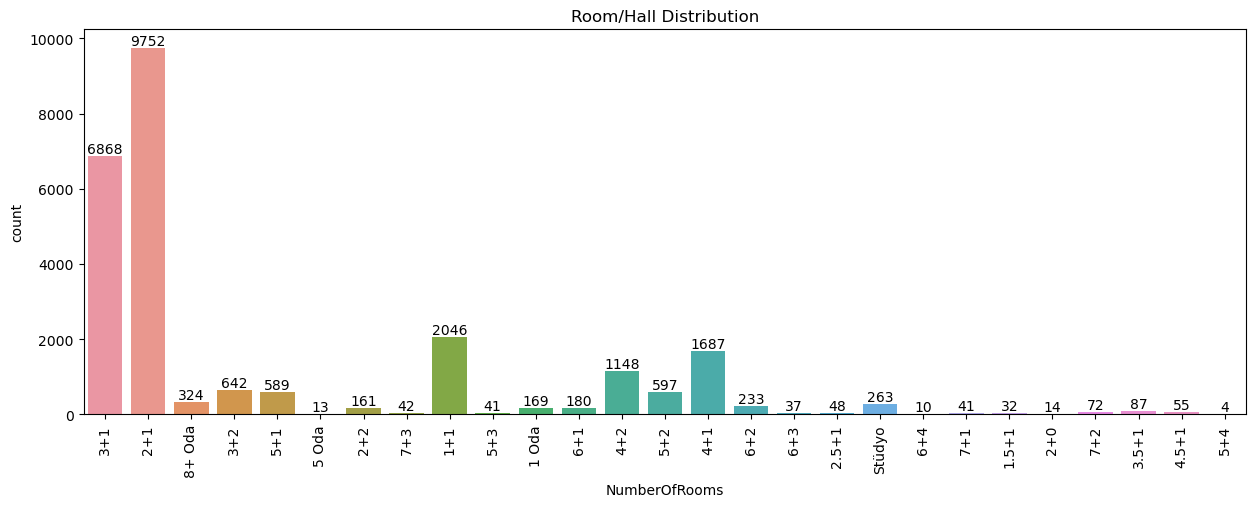

In [14]:
# Adjusts the width and height of the figure
plt.figure(figsize = (15, 5))
# Count plot based on NumberOfRooms
ax = sns.countplot(data = df3, x = "NumberOfRooms")
# Container counts
ax.bar_label(ax.containers[0])
# Rotate 90 Room Types on xlabel
plt.xticks(rotation = 90)
# Title
plt.title("Room/Hall Distribution");

In [15]:
# Convert number of rooms to room + hall format
def convert_rooms_to_room_hall(x):
    if x == "Stüdyo":
        return "1+0"
    elif x == "8+ Oda":
        return "8+0"
    elif "Oda" in x:
        return x.replace(" Oda", "+0")
    return x

# Number of halls only
def convert_rooms_to_hall(x):
    # Split from "+" and take second part
    token = x.split("+") 
    return float(token[1])

# Number of rooms only
def convert_rooms_to_room(x):
    # Split from "+" and take first part
    token = x.split("+")
    return float(token[0])

# Number of total rooms (room + hall)
def convert_rooms_to_total_room(x):
    # Split from "+" and sum two parts
    token = x.split("+")
    return (float(token[0]) + float(token[1]))
    try:
        return float(x)
    except:
        return None

In [16]:
df4 = df3.copy()
df4["NumberOfRooms"] = df4["NumberOfRooms"].apply(convert_rooms_to_room_hall)
df4["hall"] = df4["NumberOfRooms"].apply(convert_rooms_to_hall)
df4["total_room"] = df4["NumberOfRooms"].apply(convert_rooms_to_total_room)
df4["NumberOfRooms"] = df4["NumberOfRooms"].apply(convert_rooms_to_room)
df4

,district,price,GrossSquareMeters,BuildingAge,ItemStatus,NumberOfBathrooms,NumberOfRooms,FloorLocation,HeatingType,InsideTheSite,hall,total_room
0,adalar,"3,100,000TL",160 m2,21 Ve Üzeri,Eşyalı,2,3.0,Çatı Katı,Kombi Doğalgaz,Hayır,1.0,4.0
1,adalar,"1,600,000TL",120 m2,5-10,Eşyalı,1,2.0,Bahçe Katı,Kombi Doğalgaz,Hayır,1.0,3.0
2,adalar,"18,500,000TL",350 m2,21 Ve Üzeri,Boş,3,3.0,Düz Giriş,Kombi Doğalgaz,Hayır,1.0,4.0
3,adalar,"9,500,000TL",550 m2,11-15,Boş,4,8.0,Düz Giriş,Kombi Doğalgaz,Hayır,0.0,8.0
4,adalar,"25,000,000TL",840 m2,21 Ve Üzeri,Boş,3,8.0,Düz Giriş,Isıtma Yok,Hayır,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25150,zeytinburnu,"1,850,000TL",180 m2,5-10,Boş,2,4.0,4. Kat,Kombi Doğalgaz,Hayır,1.0,5.0
25151,zeytinburnu,"1,100,000TL",52 m2,3,Boş,1,1.0,3. Kat,Merkezi (Pay Ölçer),Hayır,1.0,2.0
25152,zeytinburnu,"9,000,000TL",176 m2,0 (Yeni),Boş,2,3.0,17. Kat,Jeotermal,Hayır,1.0,4.0
25153,zeytinburnu,"13,000,000TL",170 m2,5-10,Boş,2,3.0,20. Kat,Merkezi Doğalgaz,Hayır,1.0,4.0


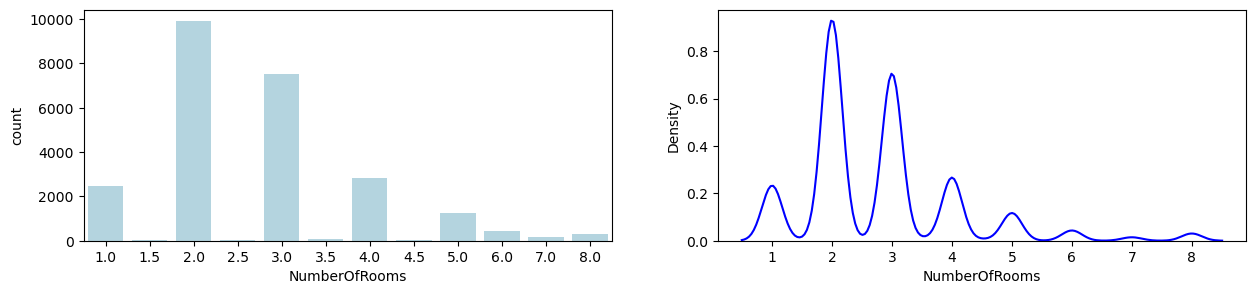

In [17]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2) 
# Adjusts the width and height of the figure
fig.set_size_inches([15, 3]) 
# Count plot based on NumberOfRooms
sns.countplot(data = df4, x = 'NumberOfRooms', color = "lightblue", dodge = False, ax = ax0) 
# Kde plot based on NumberOfRooms
sns.kdeplot(data = df4, x = 'NumberOfRooms', color = "blue", ax = ax1); 

In [18]:
df4.groupby("price")["price"].agg("count")


price
1,000,000TL                     165
1,000,000TLarrow_downward%10      1
1,000,000TLarrow_downward%14      1
1,000,000TLarrow_downward%20      1
1,000,000TLarrow_downward%29      1
                               ... 
999,000TL                        11
999,000TLarrow_downward%10        1
999,000TLarrow_downward%3         1
999,000TLarrow_downward%5         1
999,999TL                         2
Name: price, Length: 2825, dtype: int64

In [19]:
def convert_price_to_num(x):
    # Split for T and take first part
    temp = x.replace(",", "").split("T")
    return float(temp[0])
    try:
        return float(x)
    except:
        return None

In [20]:
df5 = df4.copy()
df5["price"] = df5["price"].apply(convert_price_to_num)
df5

,district,price,GrossSquareMeters,BuildingAge,ItemStatus,NumberOfBathrooms,NumberOfRooms,FloorLocation,HeatingType,InsideTheSite,hall,total_room
0,adalar,3100000.0,160 m2,21 Ve Üzeri,Eşyalı,2,3.0,Çatı Katı,Kombi Doğalgaz,Hayır,1.0,4.0
1,adalar,1600000.0,120 m2,5-10,Eşyalı,1,2.0,Bahçe Katı,Kombi Doğalgaz,Hayır,1.0,3.0
2,adalar,18500000.0,350 m2,21 Ve Üzeri,Boş,3,3.0,Düz Giriş,Kombi Doğalgaz,Hayır,1.0,4.0
3,adalar,9500000.0,550 m2,11-15,Boş,4,8.0,Düz Giriş,Kombi Doğalgaz,Hayır,0.0,8.0
4,adalar,25000000.0,840 m2,21 Ve Üzeri,Boş,3,8.0,Düz Giriş,Isıtma Yok,Hayır,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25150,zeytinburnu,1850000.0,180 m2,5-10,Boş,2,4.0,4. Kat,Kombi Doğalgaz,Hayır,1.0,5.0
25151,zeytinburnu,1100000.0,52 m2,3,Boş,1,1.0,3. Kat,Merkezi (Pay Ölçer),Hayır,1.0,2.0
25152,zeytinburnu,9000000.0,176 m2,0 (Yeni),Boş,2,3.0,17. Kat,Jeotermal,Hayır,1.0,4.0
25153,zeytinburnu,13000000.0,170 m2,5-10,Boş,2,3.0,20. Kat,Merkezi Doğalgaz,Hayır,1.0,4.0


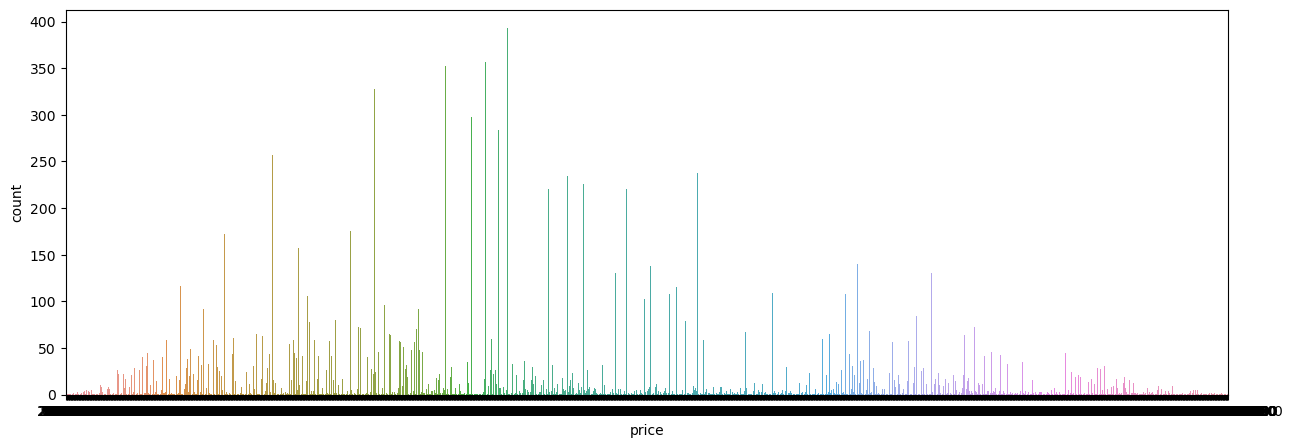

In [21]:
# Adjusts the width and height of the figure
plt.figure(figsize = (15, 5))
# Count plot based on price
sns.countplot(data = df5, x = 'price', dodge = False); 

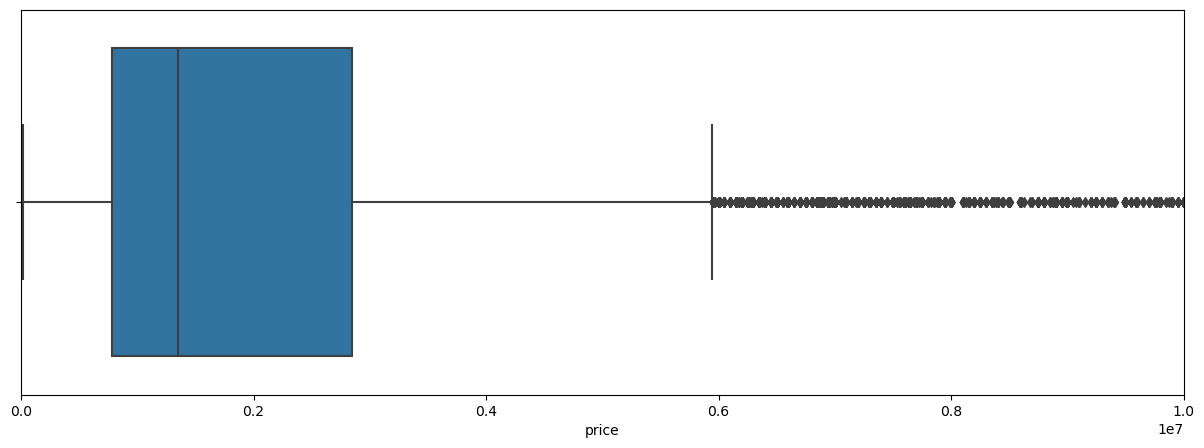

In [22]:
plt.figure(figsize = (15, 5))
# Define xlabel range
plt.xlim(0, 0.001e10)
# Box plot based on price
sns.boxplot(data = df5, x = "price");

In [23]:
df5.groupby("GrossSquareMeters")["GrossSquareMeters"].agg("count")

GrossSquareMeters
1.000 m2    26
1.014 m2     1
1.048 m2     1
1.050 m2     3
1.074 m2     1
            ..
976 m2       1
98 m2       81
980 m2       1
99 m2       12
990 m2       1
Name: GrossSquareMeters, Length: 584, dtype: int64

In [24]:
def convert_grosssquaremeters_to_num(x):
    # Split from space and take first part
    temp = x.split(" ")
    return float(temp[0])
    try:
        return float(x)
    except:
        return None

In [25]:
df6 = df5.copy()
df6["GrossSquareMeters"] = df6["GrossSquareMeters"].apply(convert_grosssquaremeters_to_num)
df6

,district,price,GrossSquareMeters,BuildingAge,ItemStatus,NumberOfBathrooms,NumberOfRooms,FloorLocation,HeatingType,InsideTheSite,hall,total_room
0,adalar,3100000.0,160.0,21 Ve Üzeri,Eşyalı,2,3.0,Çatı Katı,Kombi Doğalgaz,Hayır,1.0,4.0
1,adalar,1600000.0,120.0,5-10,Eşyalı,1,2.0,Bahçe Katı,Kombi Doğalgaz,Hayır,1.0,3.0
2,adalar,18500000.0,350.0,21 Ve Üzeri,Boş,3,3.0,Düz Giriş,Kombi Doğalgaz,Hayır,1.0,4.0
3,adalar,9500000.0,550.0,11-15,Boş,4,8.0,Düz Giriş,Kombi Doğalgaz,Hayır,0.0,8.0
4,adalar,25000000.0,840.0,21 Ve Üzeri,Boş,3,8.0,Düz Giriş,Isıtma Yok,Hayır,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25150,zeytinburnu,1850000.0,180.0,5-10,Boş,2,4.0,4. Kat,Kombi Doğalgaz,Hayır,1.0,5.0
25151,zeytinburnu,1100000.0,52.0,3,Boş,1,1.0,3. Kat,Merkezi (Pay Ölçer),Hayır,1.0,2.0
25152,zeytinburnu,9000000.0,176.0,0 (Yeni),Boş,2,3.0,17. Kat,Jeotermal,Hayır,1.0,4.0
25153,zeytinburnu,13000000.0,170.0,5-10,Boş,2,3.0,20. Kat,Merkezi Doğalgaz,Hayır,1.0,4.0


In [26]:
df6[(df6.GrossSquareMeters / df6.total_room) > 100]


,district,price,GrossSquareMeters,BuildingAge,ItemStatus,NumberOfBathrooms,NumberOfRooms,FloorLocation,HeatingType,InsideTheSite,hall,total_room
4,adalar,25000000.0,840.0,21 Ve Üzeri,Boş,3,8.0,Düz Giriş,Isıtma Yok,Hayır,0.0,8.0
19,adalar,3100000.0,250.0,21 Ve Üzeri,Boş,Yok,1.0,Düz Giriş,Isıtma Yok,Hayır,0.0,1.0
23,adalar,9000000.0,550.0,11-15,Boş,Yok,1.0,Düz Giriş,Isıtma Yok,Hayır,0.0,1.0
46,arnavutkoy,1150000.0,350.0,11-15,Boş,1,2.0,Müstakil,Kombi Doğalgaz,Hayır,1.0,3.0
94,arnavutkoy,10000000.0,700.0,5-10,Boş,1,2.0,Kot 3 (-3). Kat,Kombi Doğalgaz,Hayır,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24802,uskudar,38500000.0,950.0,11-15,Boş,5,5.0,Bahçe Dublex,Kombi Doğalgaz,Hayır,2.0,7.0
24803,uskudar,38500000.0,950.0,11-15,Boş,5,5.0,Bahçe Dublex,Kombi Doğalgaz,Hayır,2.0,7.0
24949,uskudar,55000000.0,750.0,21 Ve Üzeri,Boş,3,4.0,Villa Tipi,Kombi Doğalgaz,Hayır,2.0,6.0
25106,zeytinburnu,22260000.0,945.0,21 Ve Üzeri,Boş,4,8.0,Düz Giriş,Kombi Doğalgaz,Hayır,0.0,8.0


In [27]:
df7 = df6.copy()
df7 = df6[~((df6.GrossSquareMeters / df6.total_room) > 100)]
df7

,district,price,GrossSquareMeters,BuildingAge,ItemStatus,NumberOfBathrooms,NumberOfRooms,FloorLocation,HeatingType,InsideTheSite,hall,total_room
0,adalar,3100000.0,160.0,21 Ve Üzeri,Eşyalı,2,3.0,Çatı Katı,Kombi Doğalgaz,Hayır,1.0,4.0
1,adalar,1600000.0,120.0,5-10,Eşyalı,1,2.0,Bahçe Katı,Kombi Doğalgaz,Hayır,1.0,3.0
2,adalar,18500000.0,350.0,21 Ve Üzeri,Boş,3,3.0,Düz Giriş,Kombi Doğalgaz,Hayır,1.0,4.0
3,adalar,9500000.0,550.0,11-15,Boş,4,8.0,Düz Giriş,Kombi Doğalgaz,Hayır,0.0,8.0
5,adalar,7000000.0,200.0,21 Ve Üzeri,Boş,1,3.0,Düz Giriş,Isıtma Yok,Hayır,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25150,zeytinburnu,1850000.0,180.0,5-10,Boş,2,4.0,4. Kat,Kombi Doğalgaz,Hayır,1.0,5.0
25151,zeytinburnu,1100000.0,52.0,3,Boş,1,1.0,3. Kat,Merkezi (Pay Ölçer),Hayır,1.0,2.0
25152,zeytinburnu,9000000.0,176.0,0 (Yeni),Boş,2,3.0,17. Kat,Jeotermal,Hayır,1.0,4.0
25153,zeytinburnu,13000000.0,170.0,5-10,Boş,2,3.0,20. Kat,Merkezi Doğalgaz,Hayır,1.0,4.0


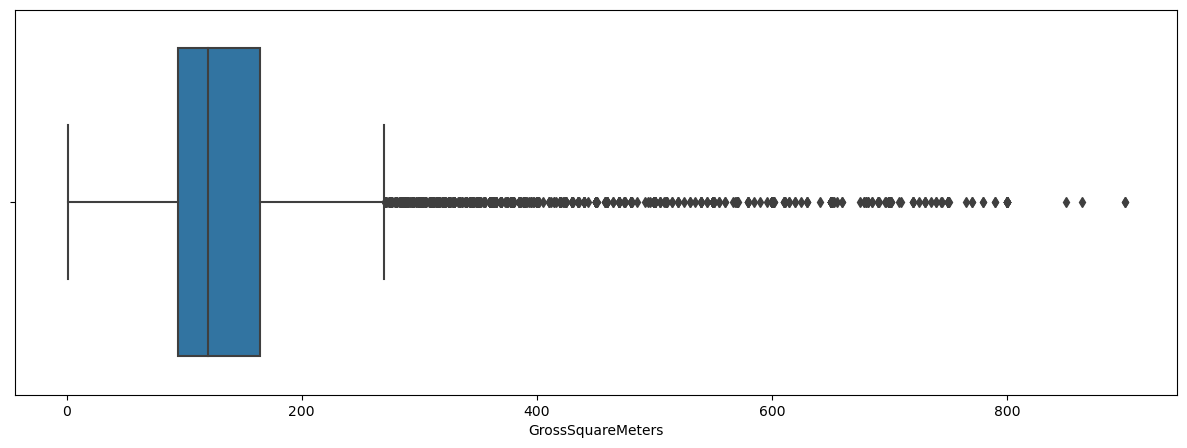

In [28]:
plt.figure(figsize = (15, 5))
# Box plot based on GrossSquareMeters
sns.boxplot(data = df7, x = "GrossSquareMeters");

In [29]:
df8 = df7.copy()
df8["price_per_sqmt"] = df8["price"] / df8["GrossSquareMeters"]
df8

,district,price,GrossSquareMeters,BuildingAge,ItemStatus,NumberOfBathrooms,NumberOfRooms,FloorLocation,HeatingType,InsideTheSite,hall,total_room,price_per_sqmt
0,adalar,3100000.0,160.0,21 Ve Üzeri,Eşyalı,2,3.0,Çatı Katı,Kombi Doğalgaz,Hayır,1.0,4.0,19375.000000
1,adalar,1600000.0,120.0,5-10,Eşyalı,1,2.0,Bahçe Katı,Kombi Doğalgaz,Hayır,1.0,3.0,13333.333333
2,adalar,18500000.0,350.0,21 Ve Üzeri,Boş,3,3.0,Düz Giriş,Kombi Doğalgaz,Hayır,1.0,4.0,52857.142857
3,adalar,9500000.0,550.0,11-15,Boş,4,8.0,Düz Giriş,Kombi Doğalgaz,Hayır,0.0,8.0,17272.727273
5,adalar,7000000.0,200.0,21 Ve Üzeri,Boş,1,3.0,Düz Giriş,Isıtma Yok,Hayır,2.0,5.0,35000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25150,zeytinburnu,1850000.0,180.0,5-10,Boş,2,4.0,4. Kat,Kombi Doğalgaz,Hayır,1.0,5.0,10277.777778
25151,zeytinburnu,1100000.0,52.0,3,Boş,1,1.0,3. Kat,Merkezi (Pay Ölçer),Hayır,1.0,2.0,21153.846154
25152,zeytinburnu,9000000.0,176.0,0 (Yeni),Boş,2,3.0,17. Kat,Jeotermal,Hayır,1.0,4.0,51136.363636
25153,zeytinburnu,13000000.0,170.0,5-10,Boş,2,3.0,20. Kat,Merkezi Doğalgaz,Hayır,1.0,4.0,76470.588235


In [30]:
df8.price_per_sqmt.describe()


count    2.486400e+04
mean     4.257854e+05
std      1.025231e+07
min      4.666667e+01
25%      7.014745e+03
50%      1.083333e+04
75%      2.059547e+04
max      6.125000e+08
Name: price_per_sqmt, dtype: float64

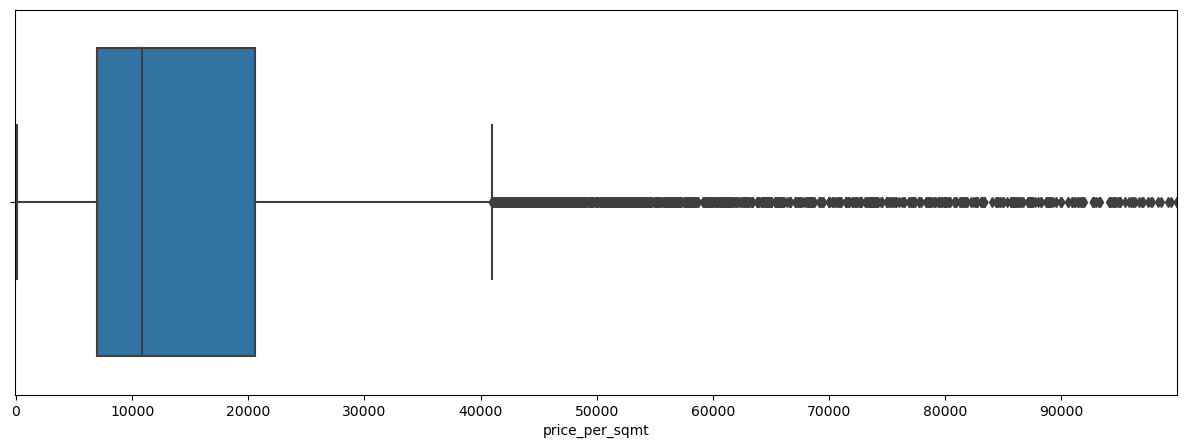

In [31]:
plt.figure(figsize = (15, 5))
plt.xlim(-100, 0.01e7)
plt.xticks(np.arange(0, 100000, 10000))
sns.boxplot(data = df8, x = "price_per_sqmt");

In [32]:
df9 = df8.copy()
df9 = df8[~(df8["price_per_sqmt"] > 35000) & ~(df8["price_per_sqmt"] < 3500)]
df9

,district,price,GrossSquareMeters,BuildingAge,ItemStatus,NumberOfBathrooms,NumberOfRooms,FloorLocation,HeatingType,InsideTheSite,hall,total_room,price_per_sqmt
0,adalar,3100000.0,160.0,21 Ve Üzeri,Eşyalı,2,3.0,Çatı Katı,Kombi Doğalgaz,Hayır,1.0,4.0,19375.000000
1,adalar,1600000.0,120.0,5-10,Eşyalı,1,2.0,Bahçe Katı,Kombi Doğalgaz,Hayır,1.0,3.0,13333.333333
3,adalar,9500000.0,550.0,11-15,Boş,4,8.0,Düz Giriş,Kombi Doğalgaz,Hayır,0.0,8.0,17272.727273
5,adalar,7000000.0,200.0,21 Ve Üzeri,Boş,1,3.0,Düz Giriş,Isıtma Yok,Hayır,2.0,5.0,35000.000000
6,adalar,3250000.0,400.0,21 Ve Üzeri,Boş,5,8.0,Bahçe Dublex,Sobalı,Hayır,0.0,8.0,8125.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25143,zeytinburnu,4400000.0,137.0,5-10,Boş,2,2.0,12. Kat,Merkezi (Pay Ölçer),Hayır,1.0,3.0,32116.788321
25146,zeytinburnu,5150000.0,401.0,1,Boş,Yok,8.0,Düz Giriş,Kombi Doğalgaz,Hayır,0.0,8.0,12842.892768
25150,zeytinburnu,1850000.0,180.0,5-10,Boş,2,4.0,4. Kat,Kombi Doğalgaz,Hayır,1.0,5.0,10277.777778
25151,zeytinburnu,1100000.0,52.0,3,Boş,1,1.0,3. Kat,Merkezi (Pay Ölçer),Hayır,1.0,2.0,21153.846154


In [33]:
def remove_room_outliers(df):
    exclude_indices = np.array([]) # List for temporary values
    for district, district_df in df.groupby("district"):
        room_stats = {} # Empty dict for stats
        for room, room_df in district_df.groupby("total_room"):
            # Mean, std and count stats 
            room_stats[room] = {
                "mean": np.mean(room_df.price_per_sqmt),
                "std": np.std(room_df.price_per_sqmt),
                "count": room_df.shape[0]
            }
        for room, room_df in district_df.groupby("total_room"):
            stats = room_stats.get(room-1) # Check for previous stat
            if stats and stats["count"] > 5: # Check if previous stat and count > 5
                # Remove whose price per sqmt < mean of price per sqmt
                exclude_indices = np.append(exclude_indices, room_df[room_df.price_per_sqmt < (stats["mean"])].index.values)
    return df.drop(exclude_indices, axis = "index")

In [34]:
df10 = df9.copy()
df10 = remove_room_outliers(df9)
df10

,district,price,GrossSquareMeters,BuildingAge,ItemStatus,NumberOfBathrooms,NumberOfRooms,FloorLocation,HeatingType,InsideTheSite,hall,total_room,price_per_sqmt
0,adalar,3100000.0,160.0,21 Ve Üzeri,Eşyalı,2,3.0,Çatı Katı,Kombi Doğalgaz,Hayır,1.0,4.0,19375.000000
1,adalar,1600000.0,120.0,5-10,Eşyalı,1,2.0,Bahçe Katı,Kombi Doğalgaz,Hayır,1.0,3.0,13333.333333
3,adalar,9500000.0,550.0,11-15,Boş,4,8.0,Düz Giriş,Kombi Doğalgaz,Hayır,0.0,8.0,17272.727273
5,adalar,7000000.0,200.0,21 Ve Üzeri,Boş,1,3.0,Düz Giriş,Isıtma Yok,Hayır,2.0,5.0,35000.000000
6,adalar,3250000.0,400.0,21 Ve Üzeri,Boş,5,8.0,Bahçe Dublex,Sobalı,Hayır,0.0,8.0,8125.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25142,zeytinburnu,4400000.0,137.0,5-10,Boş,2,2.0,10. Kat,Merkezi (Pay Ölçer),Hayır,1.0,3.0,32116.788321
25143,zeytinburnu,4400000.0,137.0,5-10,Boş,2,2.0,12. Kat,Merkezi (Pay Ölçer),Hayır,1.0,3.0,32116.788321
25146,zeytinburnu,5150000.0,401.0,1,Boş,Yok,8.0,Düz Giriş,Kombi Doğalgaz,Hayır,0.0,8.0,12842.892768
25151,zeytinburnu,1100000.0,52.0,3,Boş,1,1.0,3. Kat,Merkezi (Pay Ölçer),Hayır,1.0,2.0,21153.846154


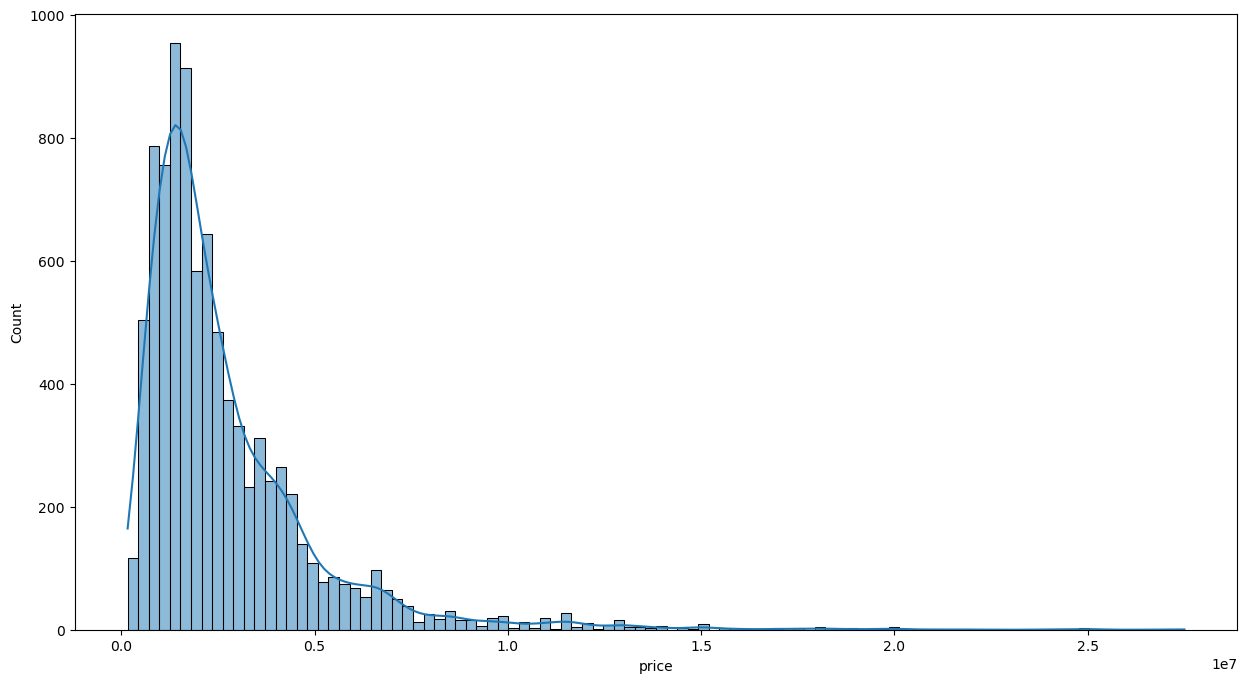

In [35]:
plt.figure(figsize = (15, 8))
# Histogram plot based on price_per_sqmt
sns.histplot(data = df10, x = "price", bins = 100, kde = True);

In [36]:
dummies1 = pd.get_dummies(df10.district)
dummies2 = pd.get_dummies(df10.ItemStatus)

In [37]:
df11 = df10.copy()
df11 = pd.concat([df10, dummies1], axis = "columns")
df11 = pd.concat([df11, dummies2], axis = "columns")
# Column names
df11.columns

Index(['district', 'price', 'GrossSquareMeters', 'BuildingAge', 'ItemStatus',
       'NumberOfBathrooms', 'NumberOfRooms', 'FloorLocation', 'HeatingType',
       'InsideTheSite', 'hall', 'total_room', 'price_per_sqmt', 'adalar',
       'arnavutkoy', 'atasehir', 'avcilar', 'bagcilar', 'bahcelievler',
       'bakirkoy', 'basaksehir', 'bayrampasa', 'besiktas', 'beykoz',
       'beylikduzu', 'beyoglu', 'buyukcekmece', 'catalca', 'cekmekoy',
       'esenler', 'esenyurt', 'eyupsultan', 'fatih', 'gaziosmanpasa',
       'gungoren', 'kadikoy', 'kagithane', 'kartal', 'kucukcekmece', 'maltepe',
       'pendik', 'sancaktepe', 'sariyer', 'sile', 'silivri', 'sisli',
       'sultanbeyli', 'sultangazi', 'tuzla', 'umraniye', 'uskudar',
       'zeytinburnu', 'Boş', 'Eşyalı'],
      dtype='object')

In [38]:
df12 = df11.copy()
df12 = df11.drop(['district', 'ItemStatus', 'total_room', 'price_per_sqmt'], axis = "columns")
df12.columns

Index(['price', 'GrossSquareMeters', 'BuildingAge', 'NumberOfBathrooms',
       'NumberOfRooms', 'FloorLocation', 'HeatingType', 'InsideTheSite',
       'hall', 'adalar', 'arnavutkoy', 'atasehir', 'avcilar', 'bagcilar',
       'bahcelievler', 'bakirkoy', 'basaksehir', 'bayrampasa', 'besiktas',
       'beykoz', 'beylikduzu', 'beyoglu', 'buyukcekmece', 'catalca',
       'cekmekoy', 'esenler', 'esenyurt', 'eyupsultan', 'fatih',
       'gaziosmanpasa', 'gungoren', 'kadikoy', 'kagithane', 'kartal',
       'kucukcekmece', 'maltepe', 'pendik', 'sancaktepe', 'sariyer', 'sile',
       'silivri', 'sisli', 'sultanbeyli', 'sultangazi', 'tuzla', 'umraniye',
       'uskudar', 'zeytinburnu', 'Boş', 'Eşyalı'],
      dtype='object')

In [39]:

def categorize_floor_location(floor_location):
    if 'Bodrum' in floor_location or 'Kot' in floor_location: 
        return 'Basement'
    elif 'Dubleks' in floor_location:
        return 'Dubleks'
    elif 'Villa Tipi' in floor_location or 'Müstakil' in floor_location or 'Bahçe' in floor_location:
        return 'Independent'
    elif 'Çatı' in floor_location:
        return 'ÇatıKatı'
    elif 'Düz' or 'Giriş' in floor_location:
        return 'DüzGiriş'
    elif 'Ve Üzeri'.lower() in floor_location.lower():
        return 'High'
    elif 'Kat' in floor_location:
        try:
            floor_num = int(floor_location.split()[0].replace('.', ''))
            if floor_num <= 3:
                return 'Low'
            elif floor_num <= 10:
                return 'Mid'
            else:
                return 'High'
        except ValueError:
            if '1-10' in floor_location:
                return 'Low-Mid'
            elif '10-20' in floor_location or '20-30' in floor_location or '30-40' in floor_location:
                return 'High'
            elif '40+' in floor_location:
                return 'Very High'
    else:
        return 'Other'

df12['FloorLocation'] = df12['FloorLocation'].apply(categorize_floor_location)


df12.columns

Index(['price', 'GrossSquareMeters', 'BuildingAge', 'NumberOfBathrooms',
       'NumberOfRooms', 'FloorLocation', 'HeatingType', 'InsideTheSite',
       'hall', 'adalar', 'arnavutkoy', 'atasehir', 'avcilar', 'bagcilar',
       'bahcelievler', 'bakirkoy', 'basaksehir', 'bayrampasa', 'besiktas',
       'beykoz', 'beylikduzu', 'beyoglu', 'buyukcekmece', 'catalca',
       'cekmekoy', 'esenler', 'esenyurt', 'eyupsultan', 'fatih',
       'gaziosmanpasa', 'gungoren', 'kadikoy', 'kagithane', 'kartal',
       'kucukcekmece', 'maltepe', 'pendik', 'sancaktepe', 'sariyer', 'sile',
       'silivri', 'sisli', 'sultanbeyli', 'sultangazi', 'tuzla', 'umraniye',
       'uskudar', 'zeytinburnu', 'Boş', 'Eşyalı'],
      dtype='object')

In [40]:
dummies_3 = pd.get_dummies(df12.FloorLocation)
dummies_5 = pd.get_dummies(df12.InsideTheSite)

df13 = df12.copy()
df13 = pd.concat([df13, dummies_3], axis = "columns")
df13 = pd.concat([df13, dummies_5], axis = "columns")

heating_dummies = pd.get_dummies(df13['HeatingType'], prefix='Heating')

# Dummy dataframe'i orijinal dataframe ile birleştirme
df13 = pd.concat([df13, heating_dummies], axis=1)
drop_columns = ['FloorLocation','InsideTheSite','HeatingType']
df13.drop(drop_columns, axis=1, inplace=True)

#df13 = df12.drop(['FloorLocation','FloorCategory'], axis = "columns")
df13.columns

Index(['price', 'GrossSquareMeters', 'BuildingAge', 'NumberOfBathrooms',
       'NumberOfRooms', 'hall', 'adalar', 'arnavutkoy', 'atasehir', 'avcilar',
       'bagcilar', 'bahcelievler', 'bakirkoy', 'basaksehir', 'bayrampasa',
       'besiktas', 'beykoz', 'beylikduzu', 'beyoglu', 'buyukcekmece',
       'catalca', 'cekmekoy', 'esenler', 'esenyurt', 'eyupsultan', 'fatih',
       'gaziosmanpasa', 'gungoren', 'kadikoy', 'kagithane', 'kartal',
       'kucukcekmece', 'maltepe', 'pendik', 'sancaktepe', 'sariyer', 'sile',
       'silivri', 'sisli', 'sultanbeyli', 'sultangazi', 'tuzla', 'umraniye',
       'uskudar', 'zeytinburnu', 'Boş', 'Eşyalı', 'Basement', 'Dubleks',
       'DüzGiriş', 'Independent', 'ÇatıKatı', 'Evet', 'Hayır',
       'Heating_Doğalgaz Sobalı', 'Heating_Güneş Enerjisi',
       'Heating_Isıtma Yok', 'Heating_Jeotermal', 'Heating_Kat Kaloriferi',
       'Heating_Klimalı', 'Heating_Kombi Doğalgaz', 'Heating_Kombi Fueloil',
       'Heating_Merkezi (Pay Ölçer)', 'Heating_Merkezi

In [42]:
df14 = df13.copy()
df14.columns

Index(['price', 'GrossSquareMeters', 'BuildingAge', 'NumberOfBathrooms',
       'NumberOfRooms', 'hall', 'adalar', 'arnavutkoy', 'atasehir', 'avcilar',
       'bagcilar', 'bahcelievler', 'bakirkoy', 'basaksehir', 'bayrampasa',
       'besiktas', 'beykoz', 'beylikduzu', 'beyoglu', 'buyukcekmece',
       'catalca', 'cekmekoy', 'esenler', 'esenyurt', 'eyupsultan', 'fatih',
       'gaziosmanpasa', 'gungoren', 'kadikoy', 'kagithane', 'kartal',
       'kucukcekmece', 'maltepe', 'pendik', 'sancaktepe', 'sariyer', 'sile',
       'silivri', 'sisli', 'sultanbeyli', 'sultangazi', 'tuzla', 'umraniye',
       'uskudar', 'zeytinburnu', 'Boş', 'Eşyalı', 'Basement', 'Dubleks',
       'DüzGiriş', 'Independent', 'ÇatıKatı', 'Evet', 'Hayır',
       'Heating_Doğalgaz Sobalı', 'Heating_Güneş Enerjisi',
       'Heating_Isıtma Yok', 'Heating_Jeotermal', 'Heating_Kat Kaloriferi',
       'Heating_Klimalı', 'Heating_Kombi Doğalgaz', 'Heating_Kombi Fueloil',
       'Heating_Merkezi (Pay Ölçer)', 'Heating_Merkezi

In [43]:
def standardize_building_age(age):
    age_str = str(age)
    if age_str == "0 (Yeni)":
        return 0
    elif '-' in age_str:
        range_vals = age_str.split('-')
        try:
            return sum(int(val) for val in range_vals) / len(range_vals)
        except ValueError:
            return None
    elif "21" or "Ve" or "Üzeri" in age_str:
        return 22
    else:
        try:
            return int(age_str)
        except ValueError:
            return None
df14['BuildingAge'] = df14['BuildingAge'].apply(standardize_building_age).astype(float)

In [44]:
def bathroom(num):
    str_num = str(num)
    if str_num.lower() == 'yok':
        return 0
    elif '+' in str_num:
        return int(str_num.split('+')[0]) + 1
    else:
        try:
            return float(num)
        except ValueError:
            return 0

df14['NumberOfBathrooms'] = df14['NumberOfBathrooms'].apply(bathroom).astype(float)



In [45]:
X = df14.drop("price", axis = "columns")
X

,GrossSquareMeters,BuildingAge,NumberOfBathrooms,NumberOfRooms,hall,adalar,arnavutkoy,atasehir,avcilar,bagcilar,...,Heating_Jeotermal,Heating_Kat Kaloriferi,Heating_Klimalı,Heating_Kombi Doğalgaz,Heating_Kombi Fueloil,Heating_Merkezi (Pay Ölçer),Heating_Merkezi Doğalgaz,Heating_Merkezi Fueloil,Heating_Sobalı,Heating_Yerden Isıtma
0,160.0,22.0,2.0,3.0,1.0,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,120.0,7.5,1.0,2.0,1.0,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,550.0,13.0,4.0,8.0,0.0,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,200.0,22.0,1.0,3.0,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,400.0,22.0,5.0,8.0,0.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25142,137.0,7.5,2.0,2.0,1.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
25143,137.0,7.5,2.0,2.0,1.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
25146,401.0,22.0,0.0,8.0,0.0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
25151,52.0,22.0,1.0,1.0,1.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [46]:
y = df14.price
y

0        3100000.0
1        1600000.0
3        9500000.0
5        7000000.0
6        3250000.0
           ...    
25142    4400000.0
25143    4400000.0
25146    5150000.0
25151    1100000.0
25154    1000000.0
Name: price, Length: 8909, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [48]:
# Model selection
scoresCV = []
regressors = [Ridge(),
              LinearRegression(),
              KNeighborsRegressor(),
              DecisionTreeRegressor(),
              GradientBoostingRegressor(),
              RandomForestRegressor(), 
              ]

for regressor in regressors:
    scoreCV = cross_val_score(regressor,
                              X_train,
                              y_train,
                              cv = ShuffleSplit(n_splits = 5, 
                                                test_size = 0.2,
                                                random_state = seed))
    scoresCV.append([regressor, np.mean(scoreCV)])

In [49]:
c_val = pd.DataFrame(scoresCV, columns = ["Regressor", "Score"])
c_val_sort = c_val.sort_values(by = "Score", ignore_index = True)
c_val_sort

,Regressor,Score
0,KNeighborsRegressor(),0.700593
1,DecisionTreeRegressor(),0.705236
2,GradientBoostingRegressor(),0.804027
3,LinearRegression(),0.804598
4,Ridge(),0.804640
5,RandomForestRegressor(),0.819062


In [50]:
# Creating model
reg = RandomForestRegressor()
# Searching parameters
params = {"n_estimators": [100, 200, 300, 400, 500],
          "max_features": [1, 2, 3, 4, 5],
          "max_depth": [1, 2, 3, 4, 5],
          "max_samples": [1000, 2000, 3000, 4000, 5000],
          "min_samples_split": [10, 20, 30, 40, 50]
         }
# Creating grid
rf_reg_grid = RandomizedSearchCV(estimator = reg, 
                                 param_distributions = params,
                                 cv = ShuffleSplit(n_splits = 5, 
                                                   test_size = 0.2,
                                                   random_state = seed),
                                 n_iter = 10,
                                 verbose = 2, 
                                 n_jobs = -1)
# Fit the model
rf_model = rf_reg_grid.fit(X_train, y_train)

# Get best parameters
print("Best parameters for Random Forest model: ", rf_model.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest model:  {'n_estimators': 300, 'min_samples_split': 40, 'max_samples': 5000, 'max_features': 4, 'max_depth': 5}


In [51]:
rf_best = pd.DataFrame.from_dict(rf_model.best_params_, orient = "index").rename(columns = {0: "Best"})
rf_best

,Best
n_estimators,300
min_samples_split,40
max_samples,5000
max_features,4
max_depth,5


In [72]:
rf_reg = RandomForestRegressor(n_estimators = int(rf_best.iloc[0,0]),
                               min_samples_split = int(rf_best.iloc[1,0]),
                               max_samples = int(rf_best.iloc[2,0]),
                               max_features = int(rf_best.iloc[3,0]),
                               max_depth = int(rf_best.iloc[4,0]),
                               random_state = seed)
# Fit the model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=4, max_samples=5000,
                      min_samples_split=40, n_estimators=300, random_state=20)

In [73]:
rf_pred = rf_reg.predict(X_test)
rf_reg.score(X_test, y_test)

0.482080140836335

In [62]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.8554428044040794

In [59]:
df10.columns

Index(['district', 'price', 'GrossSquareMeters', 'BuildingAge', 'ItemStatus',
       'NumberOfBathrooms', 'NumberOfRooms', 'FloorLocation', 'HeatingType',
       'InsideTheSite', 'hall', 'total_room', 'price_per_sqmt'],
      dtype='object')

In [78]:
def predict_price(district, item,floor,heating,site, sqmt, room, hall,age,wc):
    dist_index = np.where(X.columns == district)[0][0] # District indices
    item_index = np.where(X.columns == item)[0][0] # Item indices
    floor_index = np.where(X.columns == item)[0][0] # Item indices
    heating_index = np.where(X.columns == item)[0][0] # Item indices
    site_index = np.where(X.columns == item)[0][0] # Item indices
    # Variables and indices on columns
    x = np.zeros(len(X.columns))
    x[0] = sqmt
    x[1] = room
    x[2] = hall
    x[3] = age
    x[4] = wc
    if dist_index >= 0:
        x[dist_index] = 1
        x[item_index] = 1
        x[floor_index] = 1
        x[heating_index] = 1
        x[site_index] = 1
        
    return "Estimated Price: " + str(round(rf_reg.predict([x])[0])) + " TL"

predict_price("bagcilar", "Boş","Independent","Heating_Merkezi (Pay Ölçer)","Hayır",500, 3, 0,5,1)

C:\Users\ceren\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


'Estimated Price: 4124987 TL'